In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from srgan.models.srgan import SRGAN
from srgan.data.data_generator import test_data_generator

In [ ]:
validation_path = '/content/DIV2K_valid_HR/*.png'
validation_dataset = test_data_generator(validation_path,test_batch_size=1)
srgan = SRGAN()

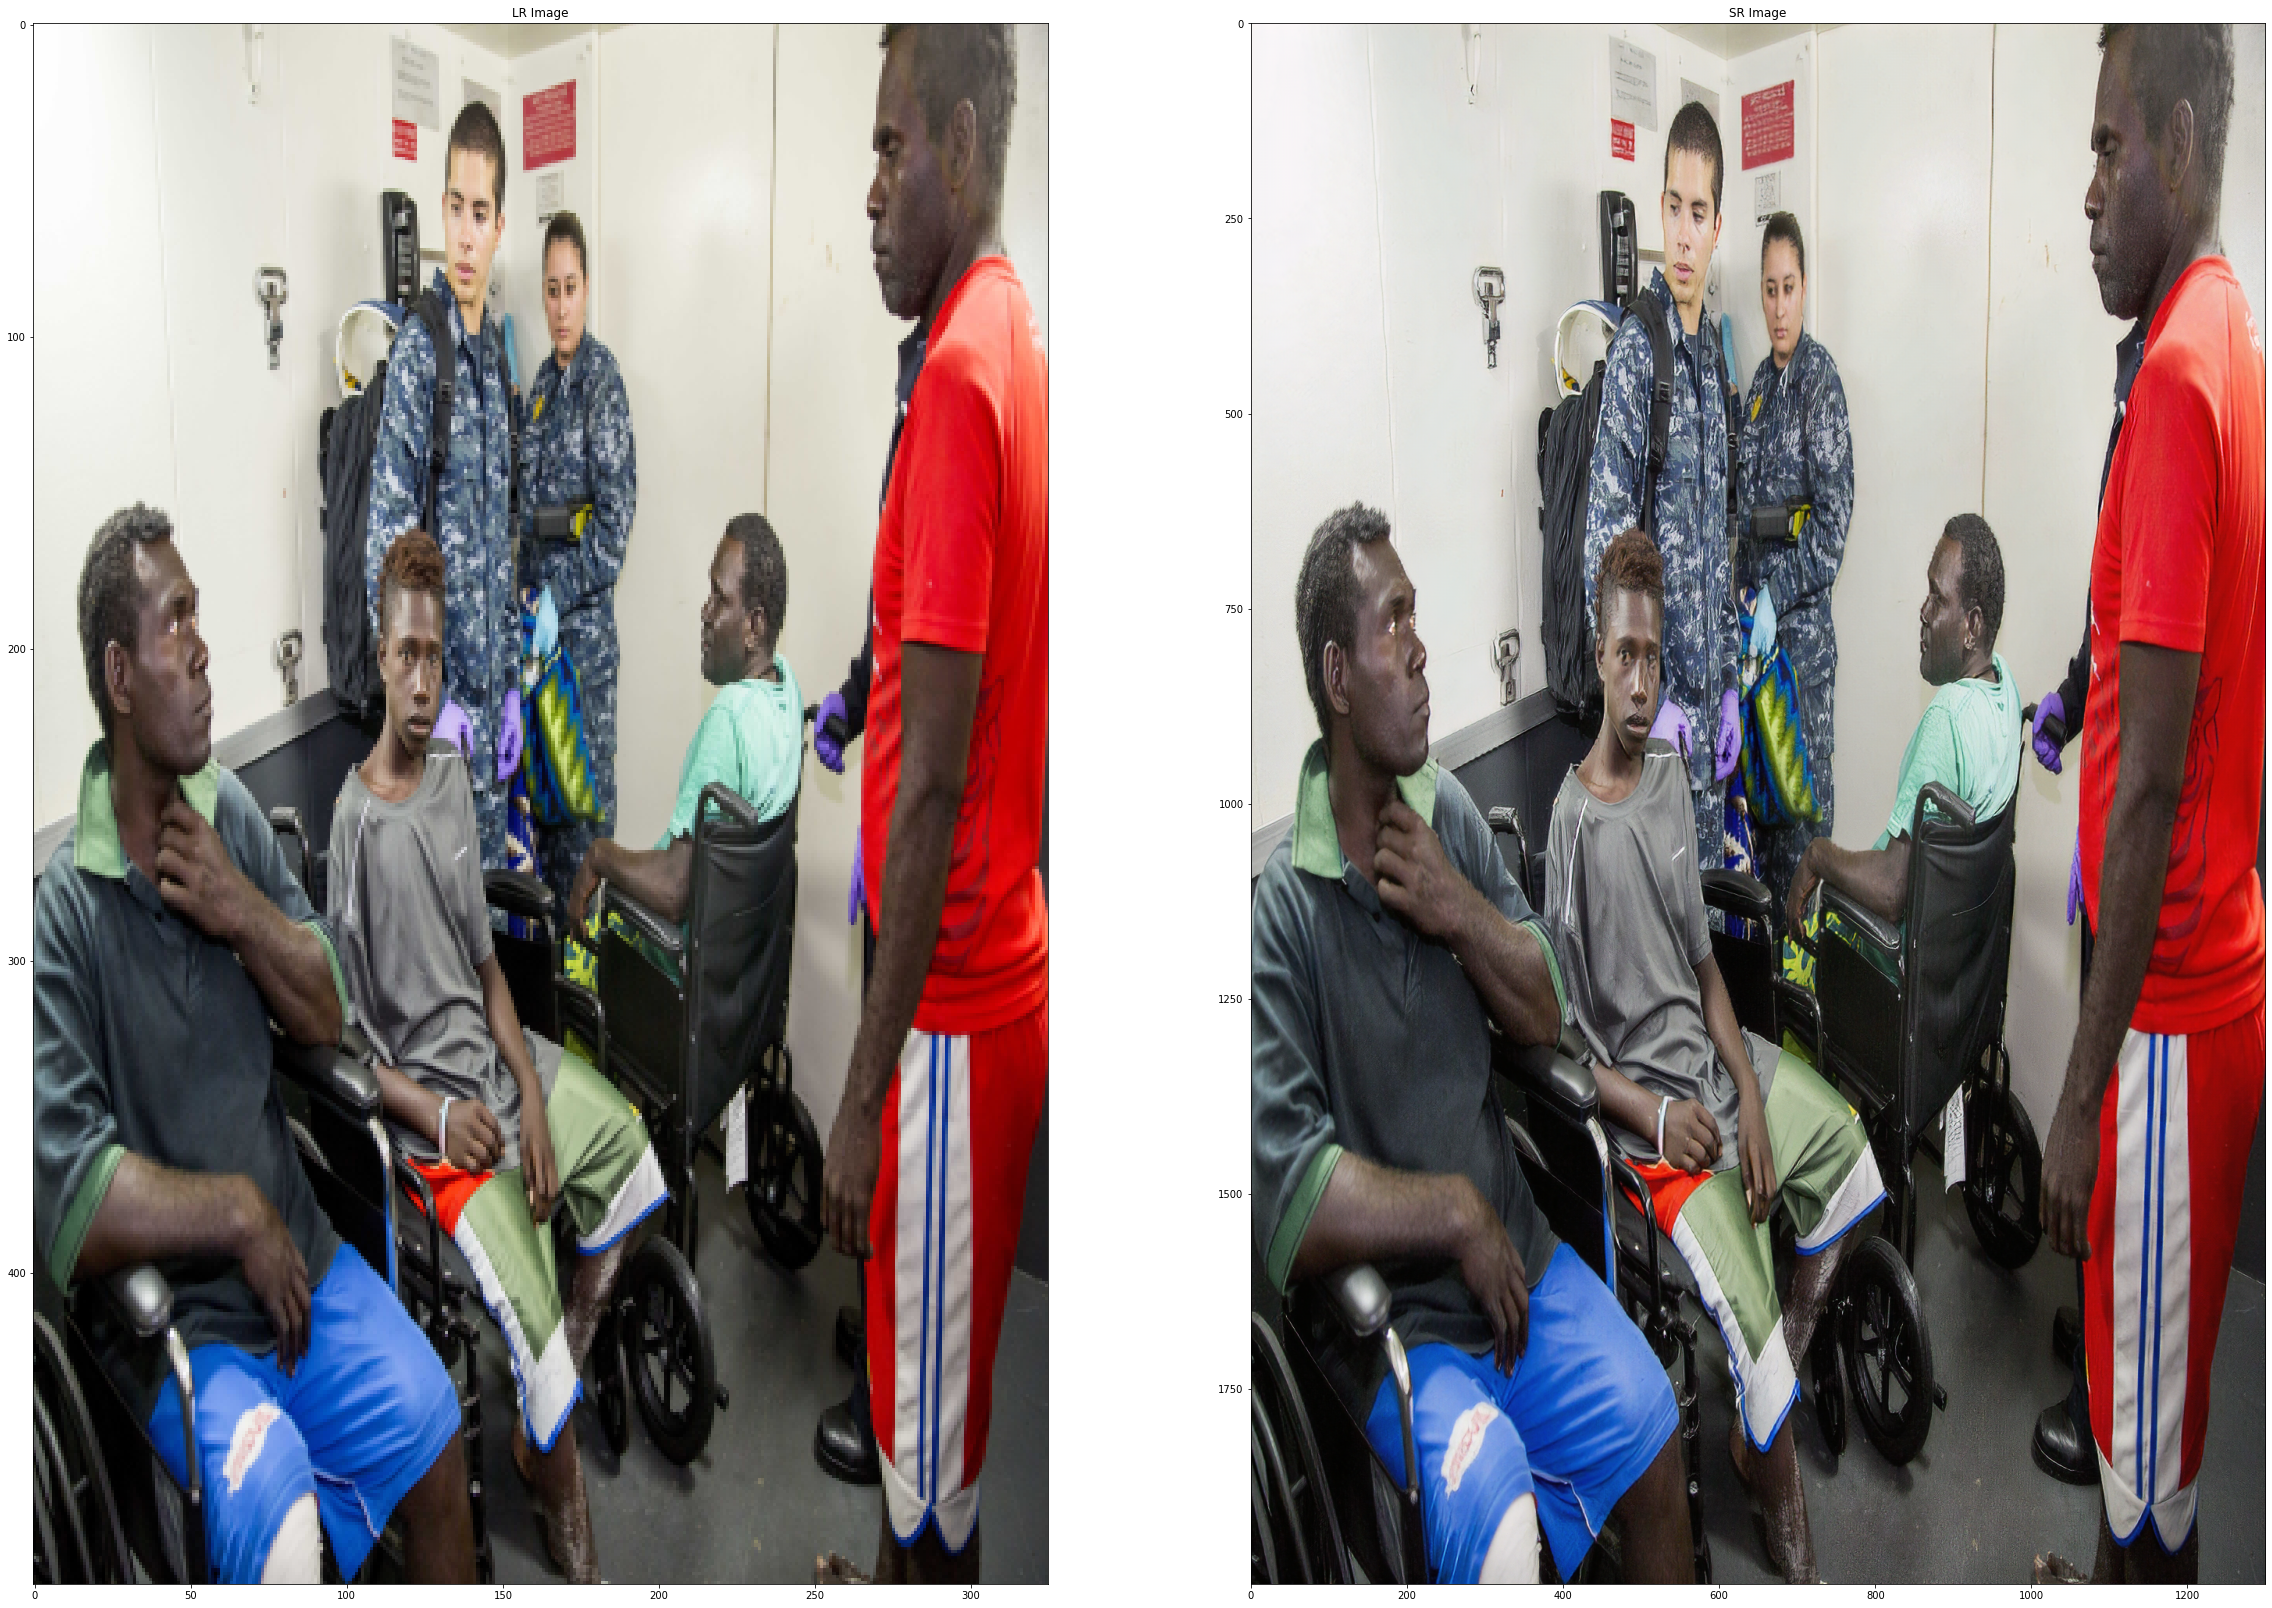

In [44]:
def test_show_image(dataset,srgan,test_image_height=1300,test_image_width=2000):
  for images in dataset.take(1):
    for i in range(1):
      hr_image = images[0][i]
      lr_image = images[1][i]
      fig, ax = plt.subplots(1, 2, figsize=(40,40))
      ax[0].imshow(tf.cast(lr_image,tf.uint8))
      ax[0].set_title("LR Image")
      sr_image = srgan(tf.expand_dims(lr_image,0))
      sr_image = tf.squeeze(sr_image)
      ax[1].imshow(tf.cast((sr_image+1)*127.5,tf.uint8))
      ax[1].set_title("SR Image")  
    plt.show()    

test_show_image(validation_dataset, srgan)